Loading Cleaned Data and Importing:

In [420]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the Excel file into a DataFrame
data = pd.read_excel("Cleaned_Survey_ICS487_Project.xlsx")

Encoding the target variable(budget rule) and Scaling numerical features

In [421]:
# Encode the target variable
label_encoder = LabelEncoder()
data['budgeting_rule'] = label_encoder.fit_transform(data['budgeting_rule'])

# # Scale numerical features for better performance
# scaler = StandardScaler()
# numerical_columns = ['salary_(sar)', 'monthly_debt_(sar)', 'elementary_expenses_(sar)', 
#                      'debt_to_income_ratio', 'savings_ratio']
# data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Model Training:

In [ ]:
# Define features (X) and target (y)
X = data.drop(['budgeting_rule'], axis=1)  # Features
y = data['budgeting_rule']  # Target

# Train a Random Forest model using OOB evaluation
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    oob_score=True,
    random_state=42
)
rf_model.fit(X, y)

# Get the OOB score
oob_score = rf_model.oob_score_
print(f"OOB Score: {oob_score:.4f}")
# Evaluate the model on training data
y_pred = rf_model.predict(X)
# Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on Training Data: {accuracy:.4f}")

OOB Score: 0.8783
Accuracy on Training Data: 0.9639


Feature Importance: Random Forest provides feature importance scores

Feature Importances:
                         Feature  Importance
12                 savings_ratio    0.450531
0                   salary_(sar)    0.173410
2      elementary_expenses_(sar)    0.130342
1             monthly_debt_(sar)    0.068484
11          debt_to_income_ratio    0.058029
4                   state_Single    0.032791
6                   goal_Savings    0.025096
3             number_of_children    0.015047
7                  goal_Spending    0.011753
9   employment_status_Unemployed    0.010540
10             age_group_encoded    0.009977
8      employment_status_Student    0.007971
5                       sex_Male    0.006030


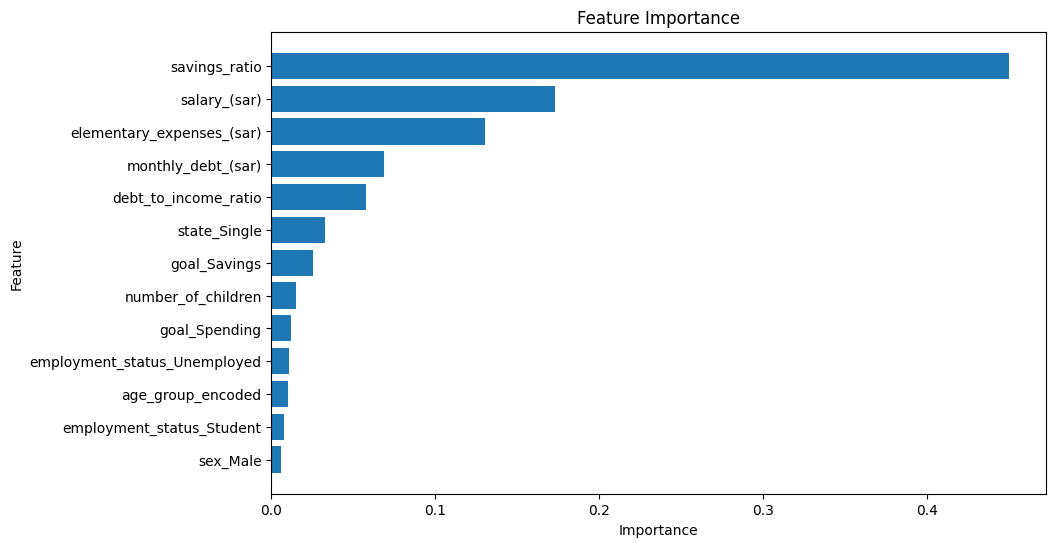

In [423]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Cross-Validation:

In [424]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.87


Saving the model:

In [425]:
import joblib

# Save the trained random forest model
joblib.dump(rf_model, 'salary_allocation_model.pkl')

['salary_allocation_model.pkl']